In [9]:
import scipy.io
import numpy as np
import matplotlib.pyplot as plt
import pickle as pkl 


In [72]:
def plotDoseResponse2(inducer,doseResponseRed, doseResponseGreen,semRed, semGreen, pad=0.01, inducerName = '[OC14]'):
    fig,ax = plt.subplots()

    ax.plot(inducer,doseResponseRed,label='RFP', c='red')
    ax.errorbar(inducer,doseResponseRed,yerr=semRed,c='red',fmt='o')
    ax.legend(loc='center left') #upper right
    # ax.ticklabel_format(useOffset=False)
    ax.set_xscale('log')
    ax.set_xlabel(inducerName)
    ax.set_ylim(0,np.amax(doseResponseRed)*1.1)
    ax.set_ylabel('RFP / ($A_{600}$ $RFP_{basal})$')
    ax2=ax.twinx()
    ax2.plot(inducer,doseResponseGreen,label='GFP', c='green')
    ax2.errorbar(inducer,doseResponseGreen,yerr=semGreen,c='green',fmt='o')
    ax2.legend(loc='center right') #upper left
    # ax2.ticklabel_format(useOffset=False)
    ax.set_xscale('log')
    ax2.set_xlabel(inducerName)
    ax2.set_ylim(0,np.amax(doseResponseGreen)*1.1)
    ax2.set_ylabel('GFP / ($A_{600}$ $GFP_{basal})$')

    plt.show()

## load dataset subcircuit3


In [6]:

mat = scipy.io.loadmat('input/subcircuit3_data.mat')


In [4]:
for i in mat.keys():
    print(i)

__header__
__version__
__globals__
avg_gfp_pC1
avg_od600_pC1
avg_rfp_pC1
conchsl_pC
sem_gfp_pC1
sem_od600_pC1
sem_rfp_pC1
time


In [35]:
np.shape(mat['sem_gfp_pC1'])


(108, 7)

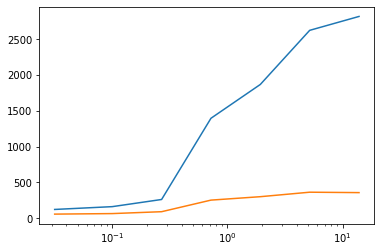

In [38]:
plt.plot(mat['conchsl_pC'][0], mat['avg_gfp_pC1'][-1]/mat['avg_od600_pC1'][-1])
plt.plot(mat['conchsl_pC'][0], mat['avg_rfp_pC1'][-1]/mat['avg_od600_pC1'][-1])

plt.xscale('log')

In [59]:
OC14_list = mat['conchsl_pC'][0]
doseResponse_gfp = mat['avg_gfp_pC1'][-1]/(mat['avg_od600_pC1'][-1]*np.amin(mat['avg_gfp_pC1'][-1]))
doseResponse_rfp = mat['avg_rfp_pC1'][-1]/(mat['avg_od600_pC1'][-1]*np.amin(mat['avg_rfp_pC1'][-1]))

doseResponse_gfp_sem = mat['sem_gfp_pC1'][-1]/(mat['avg_od600_pC1'][-1]*np.amin(mat['avg_gfp_pC1'][-1]))
doseResponse_rfp_sem = mat['sem_rfp_pC1'][-1]/(mat['avg_od600_pC1'][-1]*np.amin(mat['avg_rfp_pC1'][-1]))


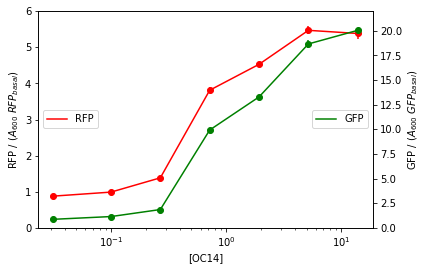

In [73]:
plotDoseResponse2(OC14_list,doseResponse_rfp, doseResponse_gfp,doseResponse_rfp_sem, doseResponse_gfp_sem)


In [75]:
subcircuit3_circuit14_doseResponse = {}
subcircuit3_circuit14_doseResponse['OC14_list'] = OC14_list
subcircuit3_circuit14_doseResponse['doseResponse_gfp'] = doseResponse_gfp
subcircuit3_circuit14_doseResponse['doseResponse_rfp'] = doseResponse_rfp
subcircuit3_circuit14_doseResponse['doseResponse_gfp_sem'] = doseResponse_gfp_sem
subcircuit3_circuit14_doseResponse['doseResponse_rfp_sem'] = doseResponse_rfp_sem
pkl.dump(subcircuit3_circuit14_doseResponse, open('input/subcircuit3_circuit14_doseResponse.pkl', 'wb'))

## load dataset subcircuit1


In [1]:
import scipy.io
import numpy as np
import matplotlib.pyplot as plt
mat = scipy.io.loadmat('input/subcircuit1_data.mat')
AHL_list = mat['ahlconc']
ATC_list = mat['atcconc']
AHL_list

In [2]:
for i in mat.keys():
    print(i)

__header__
__version__
__globals__
avg_gfp_pC1
avg_od600_pC1
avg_rfp_pC1
conchsl_pC
sem_gfp_pC1
sem_od600_pC1
sem_rfp_pC1
time


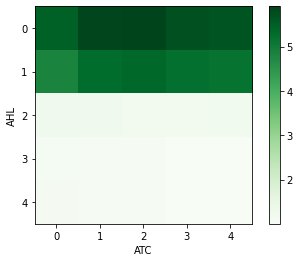

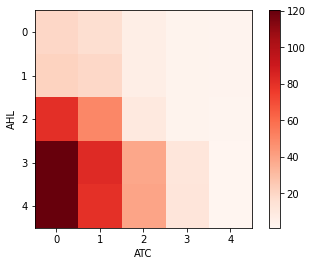

In [6]:
import pickle as pkl 
subcircuit1_circuit14_doseResponse_maxATC = {}
subcircuit1_circuit14_doseResponse_maxATC['AHL_list'] = AHL_list[0]
subcircuit1_circuit14_doseResponse_maxATC['maxATC_doseResponse_gfp'] = maxATC_doseResponse_gfp
subcircuit1_circuit14_doseResponse_maxATC['maxATC_doseResponse_rfp'] = maxATC_doseResponse_rfp
subcircuit1_circuit14_doseResponse_maxATC['maxATC_doseResponse_gfp_sem'] = maxATC_doseResponse_gfp_sem
subcircuit1_circuit14_doseResponse_maxATC['maxATC_doseResponse_rfp_sem'] = maxATC_doseResponse_rfp_sem
pkl.dump(subcircuit1_circuit14_doseResponse_maxATC, open('input/subcircuit1_circuit14_doseResponse_maxATC.pkl', 'wb'))

In [12]:
maxATC_doseResponse_gfp = mat['fc_gfp_avg'][:,0]
maxATC_doseResponse_rfp = mat['fc_rfp_avg'][:,0]

maxATC_doseResponse_gfp_sem = mat['fc_gfp_sem'][:,0]
maxATC_doseResponse_rfp_sem = mat['fc_rfp_sem'][:,0]

array([0.52599883, 0.40810658, 0.01980029, 0.00104578, 0.00122158])

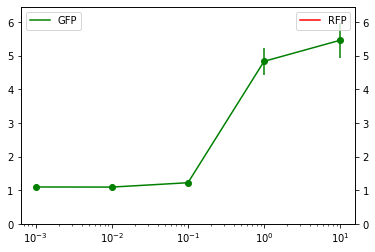

In [18]:
fig,ax = plt.subplots()
ax.plot(AHL_list[0],maxATC_doseResponse_gfp,label='GFP', c='green')
ax.errorbar(AHL_list[0],maxATC_doseResponse_gfp,yerr=maxATC_doseResponse_gfp_sem,c='green',fmt='o')
ax.set_ylim(0, np.amax(maxATC_doseResponse_gfp)+1)
ax.legend(loc=2) #upper left
ax.ticklabel_format(useOffset=False)

ax2=ax.twinx()
ax2.plot(AHL_list[0],maxATC_doseResponse_rfp,label='RFP', c='red')
ax.errorbar(AHL_list[0],maxATC_doseResponse_rfp,yerr=maxATC_doseResponse_rfp_sem,c='red',fmt='o')

ax2.set_ylim(0, np.amax(maxATC_doseResponse_gfp) + 1)
ax2.legend(loc=1) #upper right

ax.ticklabel_format(useOffset=False)
ax.set_xscale('log')
plt.show()

In [ ]:
translated_maxATC_doseResponse_gfp = maxATC_doseResponse_gfp/np.amin(maxATC_doseResponse_gfp)
translated_maxATC_doseResponse_rfp = maxATC_doseResponse_rfp/np.amin(maxATC_doseResponse_rfp)

In [21]:
import pickle as pkl 
subcircuit1_circuit14_doseResponse_maxATC = {}
subcircuit1_circuit14_doseResponse_maxATC['AHL_list'] = AHL_list[0]
subcircuit1_circuit14_doseResponse_maxATC['maxATC_doseResponse_gfp'] = maxATC_doseResponse_gfp
subcircuit1_circuit14_doseResponse_maxATC['maxATC_doseResponse_rfp'] = maxATC_doseResponse_rfp
subcircuit1_circuit14_doseResponse_maxATC['maxATC_doseResponse_gfp_sem'] = maxATC_doseResponse_gfp_sem
subcircuit1_circuit14_doseResponse_maxATC['maxATC_doseResponse_rfp_sem'] = maxATC_doseResponse_rfp_sem
pkl.dump(subcircuit1_circuit14_doseResponse_maxATC, open('input/subcircuit1_circuit14_doseResponse_maxATC.pkl', 'wb'))

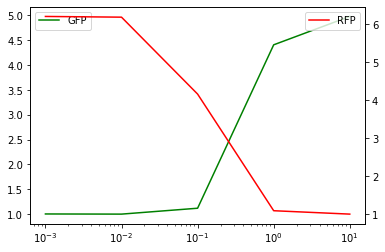

In [ ]:
fig,ax = plt.subplots()
ax.plot(AHL_list[0],translated_maxATC_doseResponse_gfp,label='GFP', c='green')
# ax.set_ylim(np.amin(U[0])-pad, np.amax(U[0])+pad)
ax.legend(loc=2) #upper left
ax.ticklabel_format(useOffset=False)

ax2=ax.twinx()
ax2.plot(AHL_list[0],translated_maxATC_doseResponse_rfp,label='RFP', c='red')
# ax2.set_ylim(np.amin(U[1])-pad, np.amax(U[1])+pad)
ax2.legend(loc=1) #upper right

ax.ticklabel_format(useOffset=False)
ax.set_xscale('log')
plt.show()
